<a href="https://colab.research.google.com/github/PranathiBobbireddi/fir-power-area-optimization/blob/main/booth_multiplier_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving approx_multipliers_with_area.csv to approx_multipliers_with_area.csv


In [ ]:
import pandas as pd

df = pd.read_csv("approx_multipliers_with_area.csv")


In [ ]:
df.head()

,BitWidth,Radix,RadixType,ApproxFactor,LUTs,FFs,DSPs,Area,Power(mW),MRED
0,32,4,Booth-4,11,860,284,0,916.8,18.62,0.00110
1,32,4,Booth-4,12,865,286,0,922.2,18.73,0.00120
2,8,2,Booth-2,3,270,94,0,288.8,5.87,0.00015
3,8,8,Booth-8,4,335,126,0,360.2,7.33,0.00080
4,32,2,Booth-2,15,860,282,0,916.4,18.61,0.00075


In [ ]:
df.shape

(1000, 10)

In [ ]:
import pandas as pd

# Assuming 'approx_multipliers_with_area (1).csv' is in the current directory
df = pd.read_csv("approx_multipliers_with_area.csv")

# Accessing the shape attribute
num_rows, num_cols = df.shape  # Assign rows and columns to variables

# Printing the shape
print("Shape of DataFrame:", df.shape)
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Displaying the first 5 rows of the DataFrame
print("\nFirst 5 rows:")
print(df.head())

Shape of DataFrame: (1000, 10)
Number of rows: 1000
Number of columns: 10

First 5 rows:
   BitWidth  Radix RadixType  ApproxFactor  LUTs  FFs  DSPs   Area  Power(mW)  \
0        32      4   Booth-4            11   860  284     0  916.8      18.62   
1        32      4   Booth-4            12   865  286     0  922.2      18.73   
2         8      2   Booth-2             3   270   94     0  288.8       5.87   
3         8      8   Booth-8             4   335  126     0  360.2       7.33   
4        32      2   Booth-2            15   860  282     0  916.4      18.61   

      MRED  
0  0.00110  
1  0.00120  
2  0.00015  
3  0.00080  
4  0.00075  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Same model for Multiple Linear Regression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
# Upload the dataset in Google Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset (change filename if needed)
df = pd.read_csv(next(iter(uploaded)))

# Encode categorical variable "RadixType"
le = LabelEncoder()
df["RadixType_Encoded"] = le.fit_transform(df["RadixType"])

# Select features (X) and target variable (y)
X = df[["BitWidth", "Radix", "RadixType_Encoded", "ApproxFactor", "LUTs", "FFs", "DSPs", "Area"]]  # Multiple features
y = df["Power(mW)"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multiple Linear Regression model (same as LinearRegression)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

joblib.dump(model, "multiple_linear_regression_fir.pkl")  # Changed filename
print("Model saved as multiple_linear_regression_fir.pkl")

Saving approx_multipliers_with_area.csv to approx_multipliers_with_area (2).csv
Model Performance:
Mean Absolute Error: 2.5490720645393595e-15
Mean Squared Error: 1.199857436841159e-29
R² Score: 1.0
Model saved as multiple_linear_regression_fir.pkl


Saving approx_multipliers_with_area.csv to approx_multipliers_with_area (3).csv


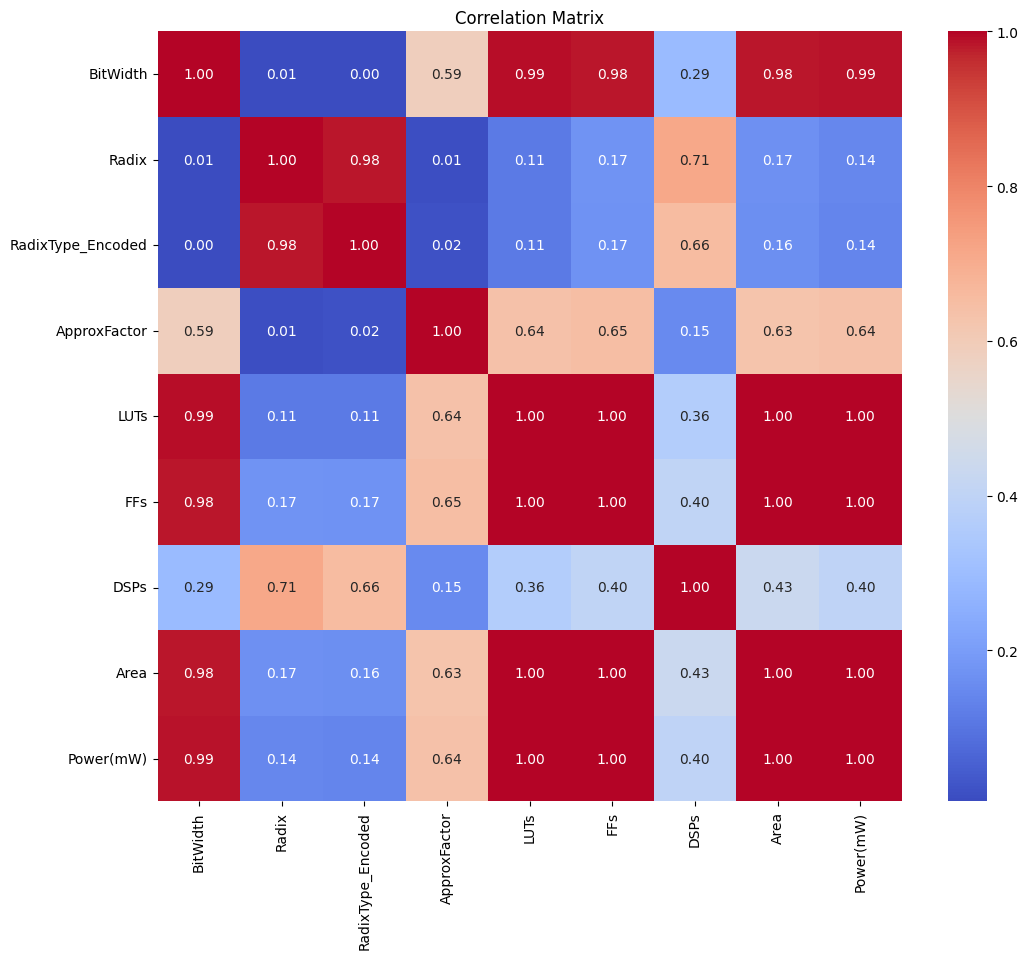

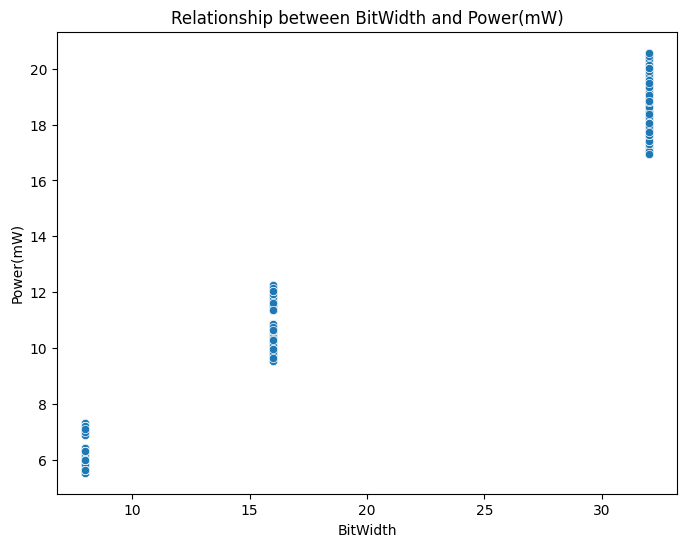

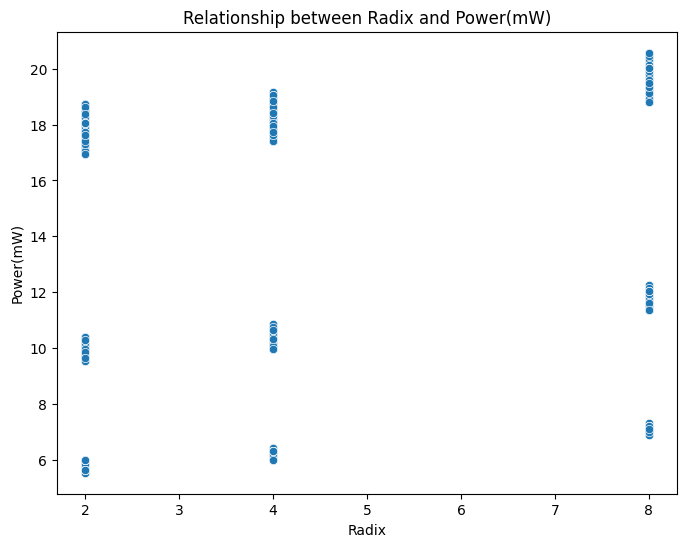

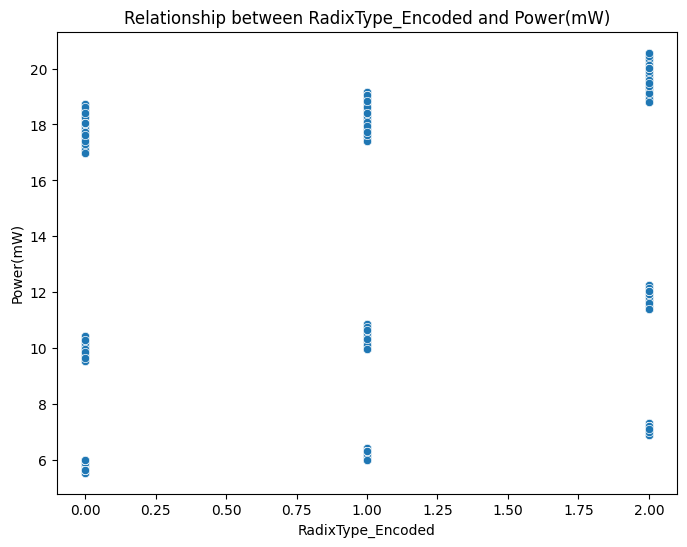

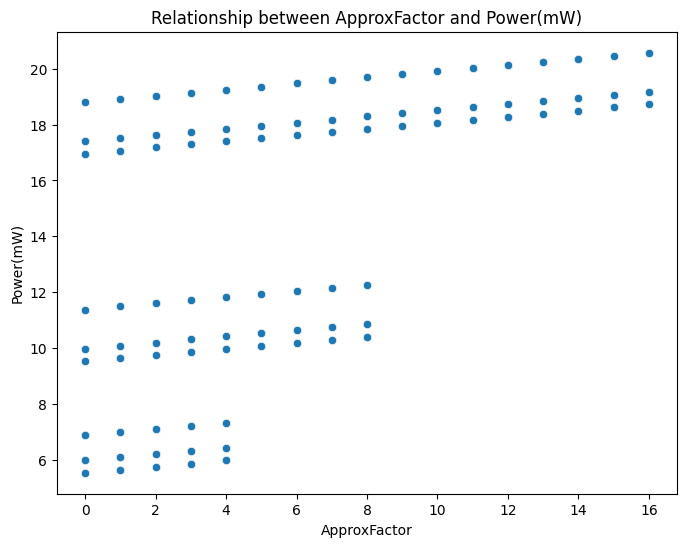

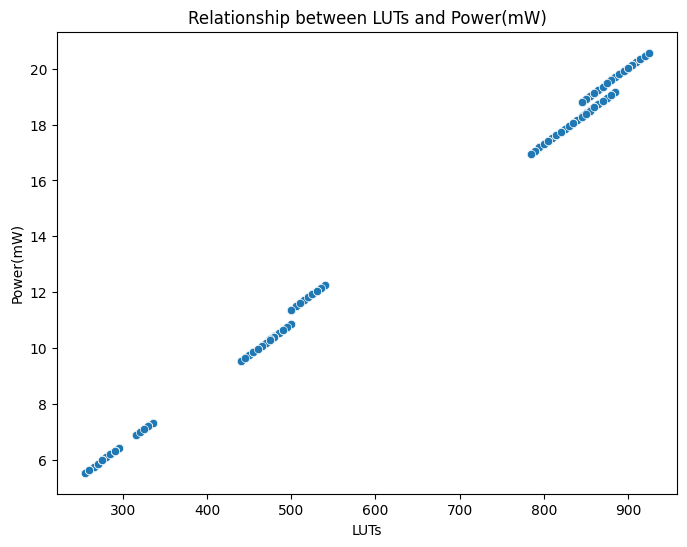

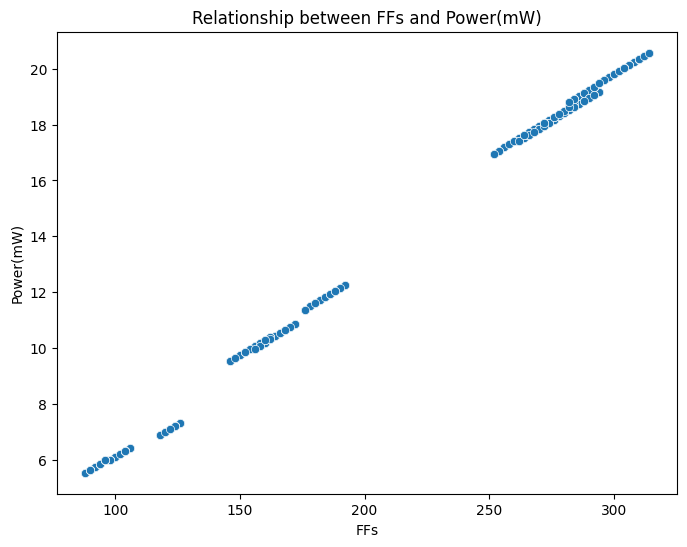

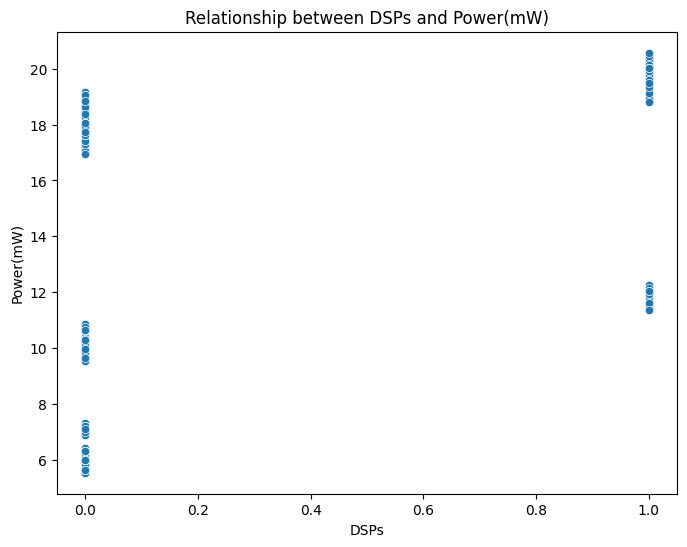

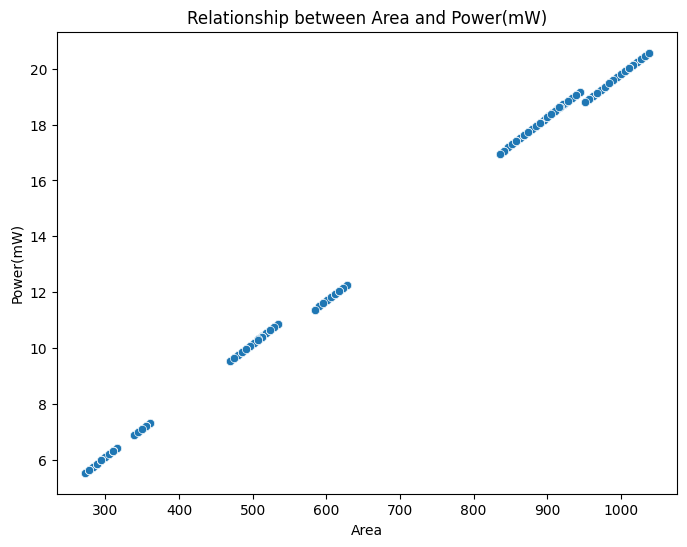

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv(next(iter(uploaded)))
# Assuming 'RadixType' is a categorical column, we need to encode it before correlation analysis
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RadixType_Encoded'] = le.fit_transform(df['RadixType'])

# Select numerical features for correlation analysis
numerical_features = ['BitWidth', 'Radix', 'RadixType_Encoded', 'ApproxFactor', 'LUTs', 'FFs', 'DSPs', 'Area', 'Power(mW)']
df_numerical = df[numerical_features]

# Calculate correlation matrix
correlation_matrix = df_numerical.corr()

# Display correlation matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Create scatter plots for relationships between features and target variable
for feature in numerical_features[:-1]:  # Exclude the target variable 'Power(mW)'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='Power(mW)', data=df)
    plt.title(f"Relationship between {feature} and Power(mW)")
    plt.xlabel(feature)
    plt.ylabel("Power(mW)")
    plt.show()

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['BitWidth', 'Radix', 'ApproxFactor', 'LUTs', 'FFs', 'DSPs', 'MRED']),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['RadixType']),
    ])

# Create the area pipeline
area_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Create the power pipeline
power_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Assuming you have a DataFrame named 'df' with your training data
# (replace with your actual training data loading)

# Separate features (X) and target variables (y) for area and power
X_area = df[['BitWidth', 'Radix', 'RadixType', 'ApproxFactor', 'LUTs', 'FFs', 'DSPs', 'MRED']]
y_area = df['Area']
X_power = df[['BitWidth', 'Radix', 'RadixType', 'ApproxFactor', 'LUTs', 'FFs', 'DSPs', 'MRED']]
y_power = df['Power(mW)']

# Train the pipelines
area_pipeline.fit(X_area, y_area)
power_pipeline.fit(X_power, y_power)

# Now you can use the pipelines for prediction as before:

# Sample data
sample_data = pd.DataFrame({
    'BitWidth': [16],
    'Radix': [4],
    'RadixType': ['Booth-4'],
    'ApproxFactor': [5],
    'LUTs': [480],
    'FFs': [164],
    'DSPs': [0],
    'MRED': [0.0005]
})

# Predict Area and Power
predicted_area = area_pipeline.predict(sample_data)
predicted_power = power_pipeline.predict(sample_data)

print(f"\nPredicted Area for sample data: {predicted_area[0]:.2f}")
print(f"Predicted Power for sample data: {predicted_power[0]:.2f} mW")
# ... (rest of the code)


Predicted Area for sample data: 512.80
Predicted Power for sample data: 10.42 mW


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Display the columns to identify feature names
print("Columns in your dataset:")
print(df.columns.tolist())  # Run this first to verify column names

# Step 1: Define your feature and target columns (updated)
features = ['BitWidth', 'Radix', 'ApproxFactor']  # Updated with actual column names
target_area = 'Area'
target_power = 'Power(mW)'

# Step 2: Train the models
area_model = LinearRegression()
power_model = LinearRegression()

# Fit the models using the updated feature names
area_model.fit(df[features], df[target_area])
power_model.fit(df[features], df[target_power])

# Step 3: Predict on the entire dataset
df['Predicted_Area'] = area_model.predict(df[features])
df['Predicted_Power(mW)'] = power_model.predict(df[features])

# Step 4: Plot actual vs predicted
# ... (rest of the code remains the same)

Columns in your dataset:
['BitWidth', 'Radix', 'RadixType', 'ApproxFactor', 'LUTs', 'FFs', 'DSPs', 'Area', 'Power(mW)', 'MRED', 'Predicted_Area', 'Predicted_Power(mW)']


Columns in your dataset:
['BitWidth', 'Radix', 'RadixType', 'ApproxFactor', 'LUTs', 'FFs', 'DSPs', 'Area', 'Power(mW)', 'MRED', 'Predicted_Area', 'Predicted_Power(mW)']


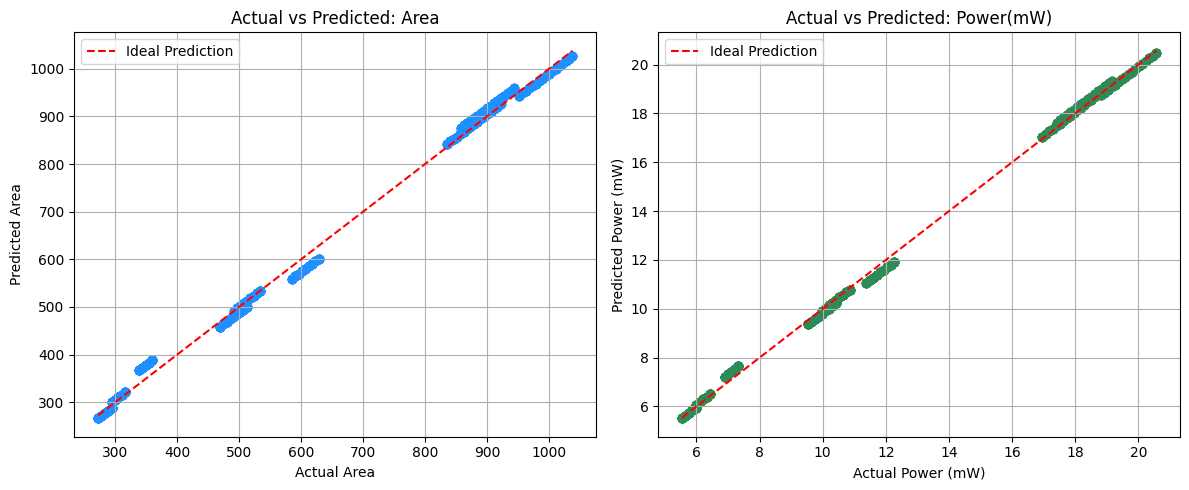

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Display the columns to identify feature names
print("Columns in your dataset:")
print(df.columns.tolist())  # Run this first to verify column names

# Step 1: Define your feature and target columns (updated)
features = ['BitWidth', 'Radix', 'ApproxFactor']  # Updated with actual column names
target_area = 'Area'
target_power = 'Power(mW)'

# Step 2: Train the models
area_model = LinearRegression()
power_model = LinearRegression()

# Fit the models using the updated feature names
area_model.fit(df[features], df[target_area])
power_model.fit(df[features], df[target_power])

# Step 3: Predict on the entire dataset
df['Predicted_Area'] = area_model.predict(df[features])
df['Predicted_Power(mW)'] = power_model.predict(df[features])

# Step 4: Plot actual vs predicted
plt.figure(figsize=(12, 5))

# --- Area Plot ---
plt.subplot(1, 2, 1)
plt.scatter(df[target_area], df['Predicted_Area'], color='dodgerblue', alpha=0.7)
plt.plot([df[target_area].min(), df[target_area].max()],
         [df[target_area].min(), df[target_area].max()],
         'r--', label='Ideal Prediction')  # Red dashed line for ideal prediction
plt.title("Actual vs Predicted: Area")
plt.xlabel("Actual Area")
plt.ylabel("Predicted Area")
plt.legend()
plt.grid(True)

# --- Power Plot ---
plt.subplot(1, 2, 2)
plt.scatter(df[target_power], df['Predicted_Power(mW)'], color='seagreen', alpha=0.7)
plt.plot([df[target_power].min(), df[target_power].max()],
         [df[target_power].min(), df[target_power].max()],
         'r--', label='Ideal Prediction')  # Red dashed line for ideal prediction
plt.title("Actual vs Predicted: Power(mW)")
plt.xlabel("Actual Power (mW)")
plt.ylabel("Predicted Power (mW)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()